<a href="https://colab.research.google.com/github/satyakipal99/Unsupervised-ML-Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name: Unsupervised ML - Netflix Movies and TV Shows Clustering



*   Project Type - Unsupervised Machine Learning
*   Contribution - Individual
*   Team Member 1 - Satyaki Pal





## 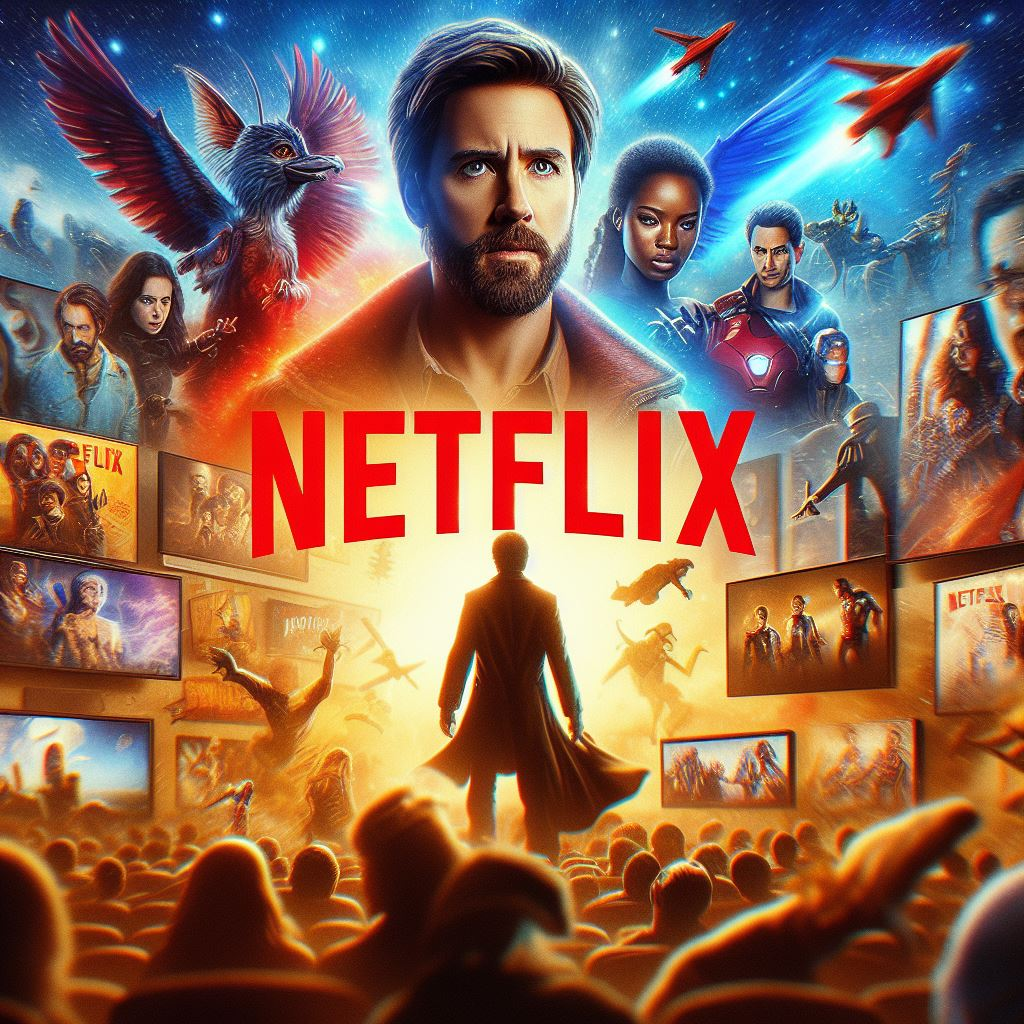

## Project Summary

The objective of this project is to analyze and cluster a dataset related to Netflix. **The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters**.

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. **Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features**.

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. **The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the clustering process, the results will be evaluated and interpreted. **The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies**.

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. **Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix** to enhance user experience and content offerings.

**In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company**.

## GitHub Repo Link -

[Project Link to GitHub](https://github.com/satyakipal99/Unsupervised-ML-Netflix-Movies-and-TV-Shows-Clustering)

## Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

## 1. Data Understanding

### Importing Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### 1. Dataset Loading And Cleanup

#### Dataset Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

#### Dataset Cleanup

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##### Duplicated Values

In [ ]:
df.duplicated().sum()

0

##### Missing Values

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
df.isnull().sum().sum()

3631

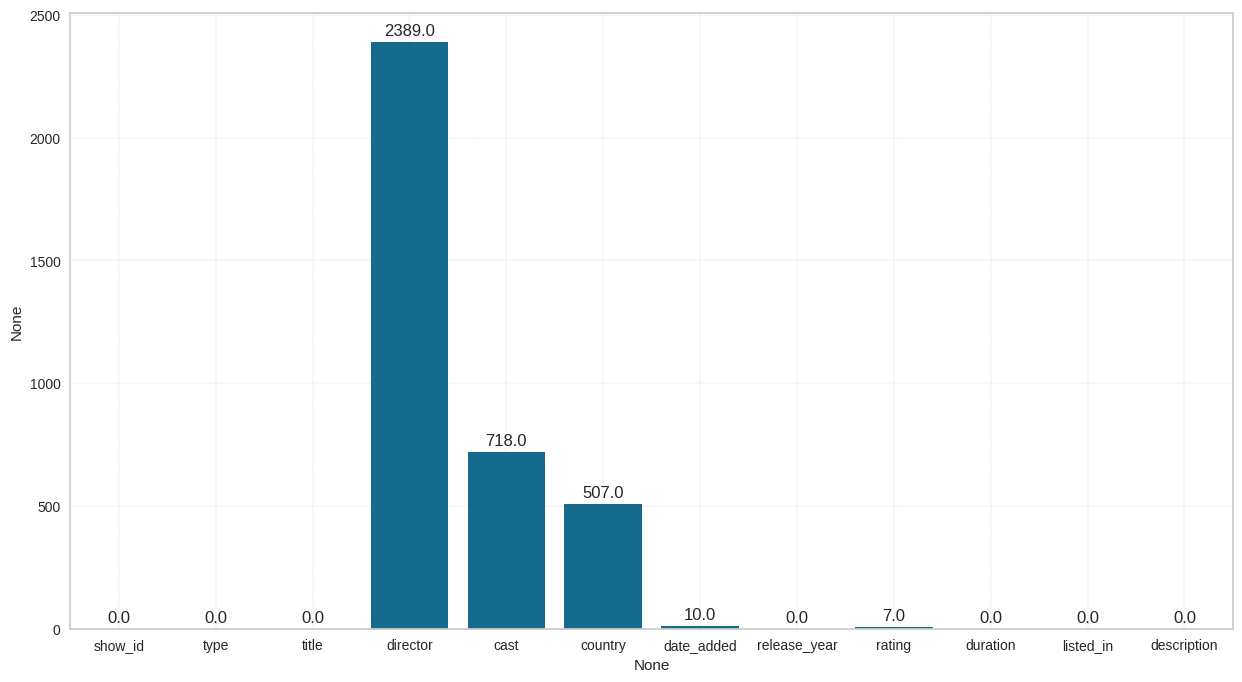

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=df.columns,y=df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

In [ ]:
## Imputing null value as per our discussion
# imputing with unknown in null values of director and cast feature
df[['director','cast']]=df[['director','cast']].fillna("Unknown")

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(7770, 12)

### What did you learned about your dataset?

**Answer Here**

This dataset  contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. After imputation and removal of null values, it consists of 12 columns and 7770 rows.


### 2. Understanding Variables

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Variable Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

#### Checking Unique Values

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [Unknown, Jorge Michel Grau, Gilbert Chan, Sha...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


#### Create new features to store date, day, month and year seperately

In [ ]:
# Write your code to make your dataset analysis ready.

df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

#### Seperating Movies and TV Shows

In [ ]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(5372, 15) (2398, 15)


## 2. EDA (Exploratory Data Analysis) and Visualization

#### Chart - 1 (The relative percentage of total number of Movies and TV Shows over Netflix)

In [ ]:
# Chart - 1 visualization code

labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.7),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

##### **1. Why did you pick the specific chart?**








Answer Here.

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

#####**2. What is/are the insight(s) found from the chart?**

**Answer Here**

TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.

#### Chart - 2 (Content added and released over the years)

In [ ]:
# Chart - 2 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

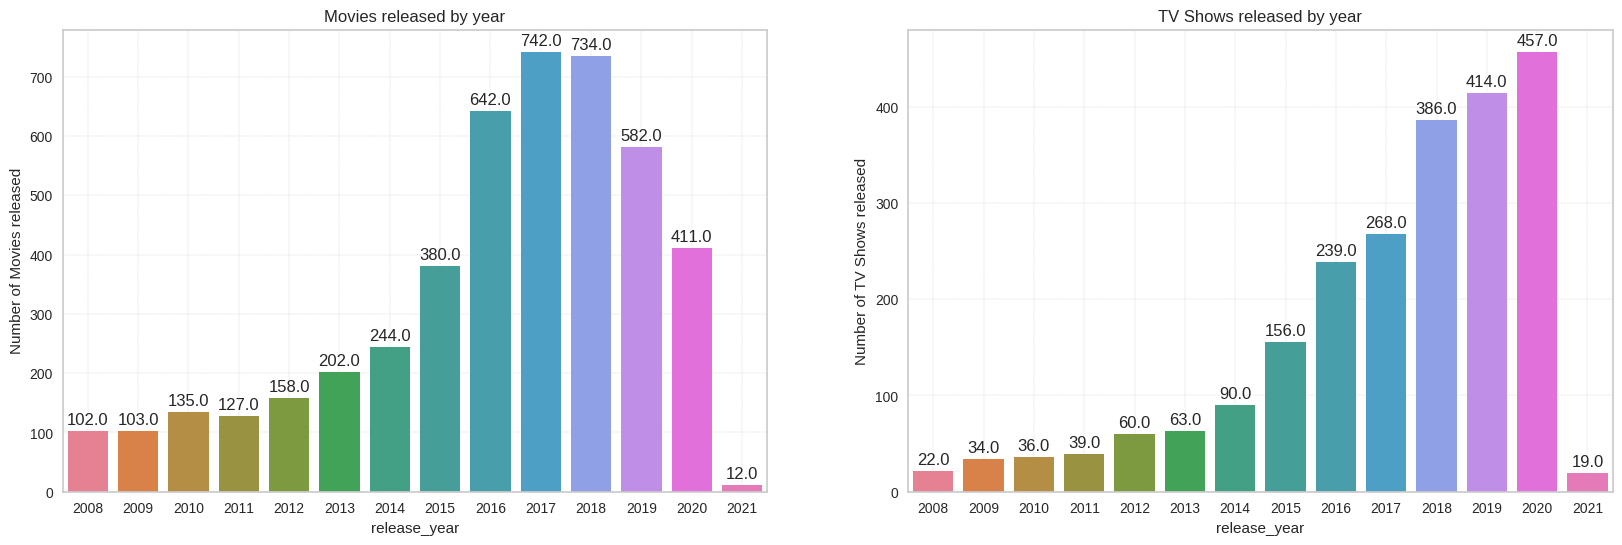

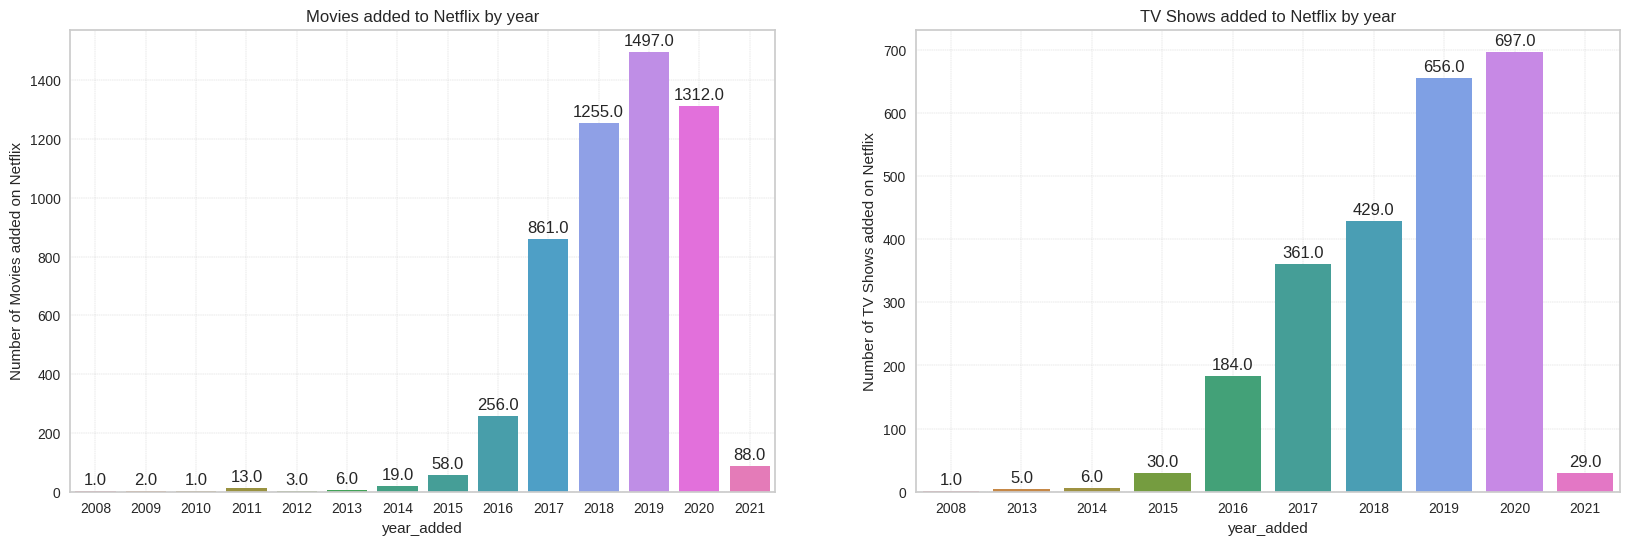

In [ ]:
plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_release_year = i.groupby(['release_year']).agg({'title':'nunique'}).reset_index().sort_values(by=['release_year'],ascending=False)[:14]
  plots= sns.barplot(x = 'release_year',y= 'title', data = df_release_year, palette='husl')
  plt.title(f'{j} released by year')
  plt.ylabel(f"Number of {j} released")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

plt.figure(figsize=(20,6))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_country, palette='husl')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here**

This graph shows us how many movies and TV Show are added and released over the years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

We can see that the **number of movies and TV shows added on Netflix has been increasing steadily every year.** But **since 2018, the number of Movies released on Netflix has been lowered and the number of TV shows released has been significantly increased.** In terms of movies and TV Shows addition, in 2020 Number of movies added as compared to 2019 were vey less and on the other side number of TV Shows were more as compare to 2019.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The insight that the number of movies added has decreased since 2018 while the number of TV shows added has significantly increased could potentially lead to negative growth for Netflix. This could be due to various reasons such as changing consumer preferences, increased competition from other streaming services, and higher production costs associated with creating movies.

To mitigate the potential negative impact, Netflix could explore strategies to diversify its content offerings and adapt to changing consumer preferences. This could include investing in a mix of movies, TV shows, and other forms of original content such as documentaries, limited series, and stand-up comedy specials. By diversifying its content offerings, Netflix can attract a wider audience and maintain its relevance in the ever-evolving streaming landscape.

#### Chart - 3 (Total number of Movies and TV Shows added per month on Netflix)

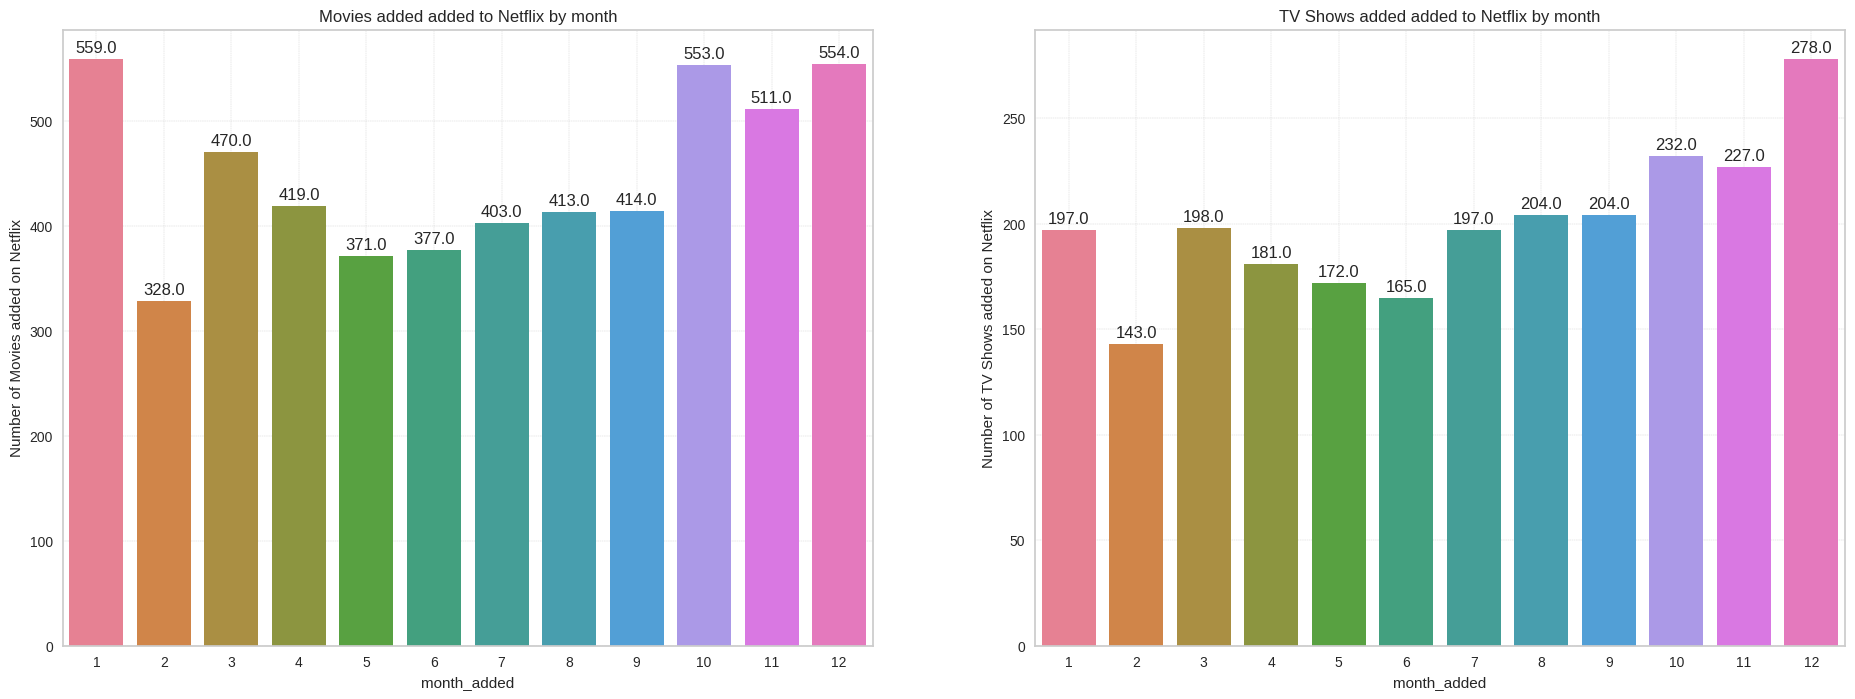

In [ ]:
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_month = i.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
  plots= sns.barplot(x = 'month_added',y='title', data = df_month, palette='husl')
  plt.title(f'{j} added added to Netflix by month')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)
  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here**

We have plotted this graph to know in which month the movie/tv shows added is **maximum** and in which year **minimum**.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**

1. We found that **October, November and December are the most popular months for TV shows addition**.

2. **January, October and December are the most popular months for movie addition**.

3. February is the least popular month for the movies and TV shows to be added on Netflix.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The insights gained can help Netflix create a positive business impact by identifying the most popular months for new content additions. This can help Netflix plan content releases during peak periods, leading to increased user engagement and retention.

The insight that February is the least popular month for new content additions could potentially lead to negative growth if Netflix does not maintain a consistent flow of new content during this period. It is important for Netflix to keep its audience engaged throughout the year to avoid dissatisfaction and potential loss of subscribers.

#### Chart - 4 (What is the Distribution of Duration of Movies over Netflix?)

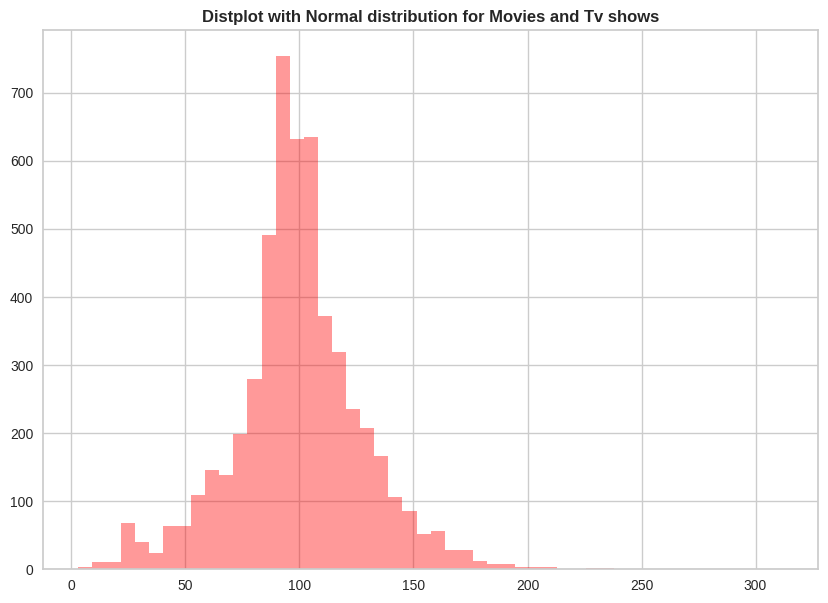

In [ ]:
# Chart - 5 visualization code
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here**

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

##### 2. **What is/are the insight(s) found from the chart?**

**Answer Here**

The average length of movies falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

**Positive Business Impact:**

1-**Audience Flexibility :** By offering movies and TV shows with a variety of lengths, ranging from shorter films to longer epic productions, Netflix can cater to the diverse preferences and schedules of its audience

2-**Increased Engagement :** Movies and TV shows with varying lengths provide options for viewers to choose content that fits their available time. This can lead to increased engagement and longer viewing sessions

3-**Content Diversity :** By including movies and TV shows of different lengths, Netflix can expand its content library and cater to various genres and storytelling formats.

#### Chart - 5 (What is the Distribution of Duration of TV Shows over Netflix?)

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

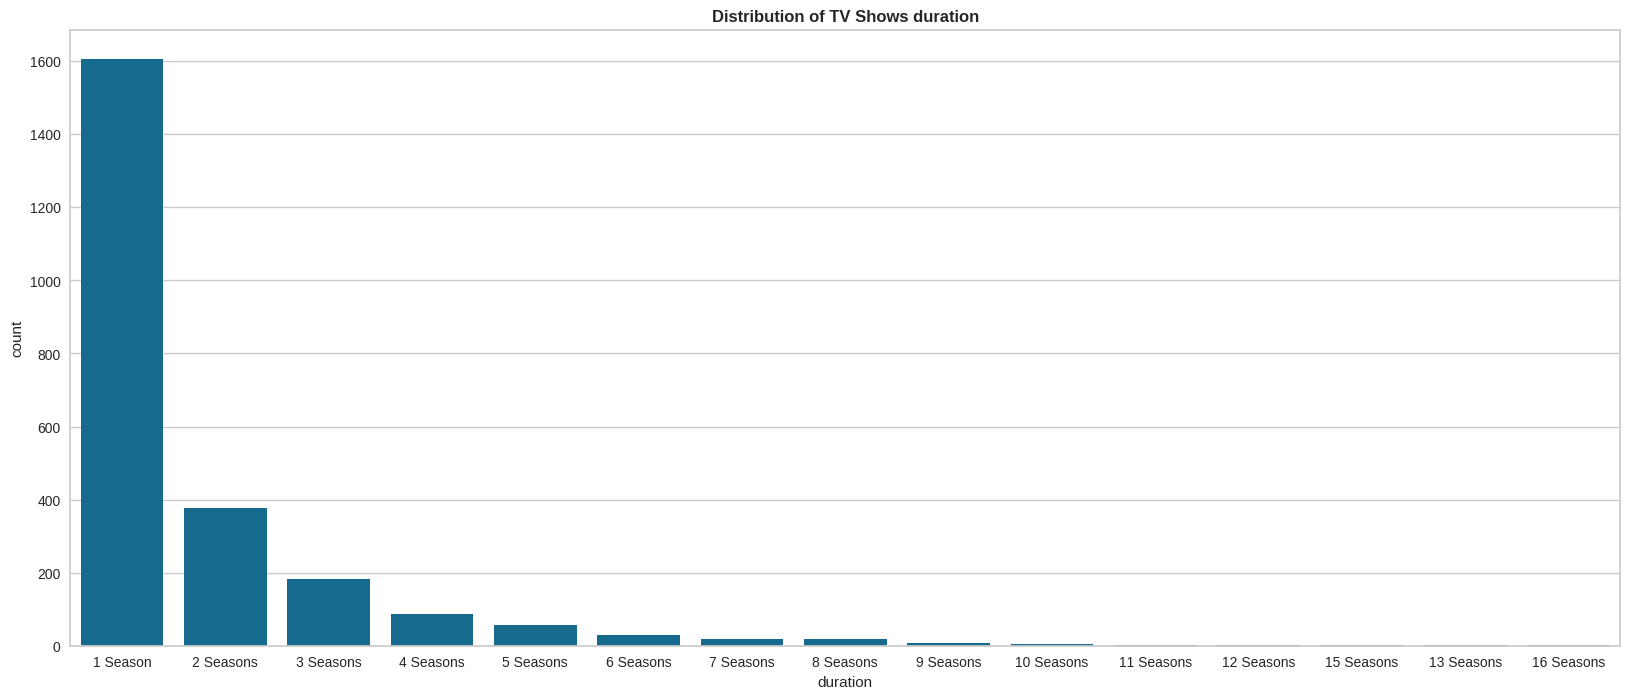

In [ ]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

#####**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, it helps creating a **Positive Impact**  because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.


#### Chart - 6 (Top Actors)

In [ ]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Unknown             718
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     30
Om Puri              30
                   ... 
Mylene Dizon          1
Lorenz Martinez       1
Art Acuña             1
Archie Alemania       1
Rachel Khoo           1
Length: 32837, dtype: int64

In [ ]:
cast= cast[cast != 'Unknown']
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Takahiro Sakurai    29
                    ..
Mylene Dizon         1
Lorenz Martinez      1
Art Acuña            1
Archie Alemania      1
Rachel Khoo          1
Length: 32836, dtype: int64

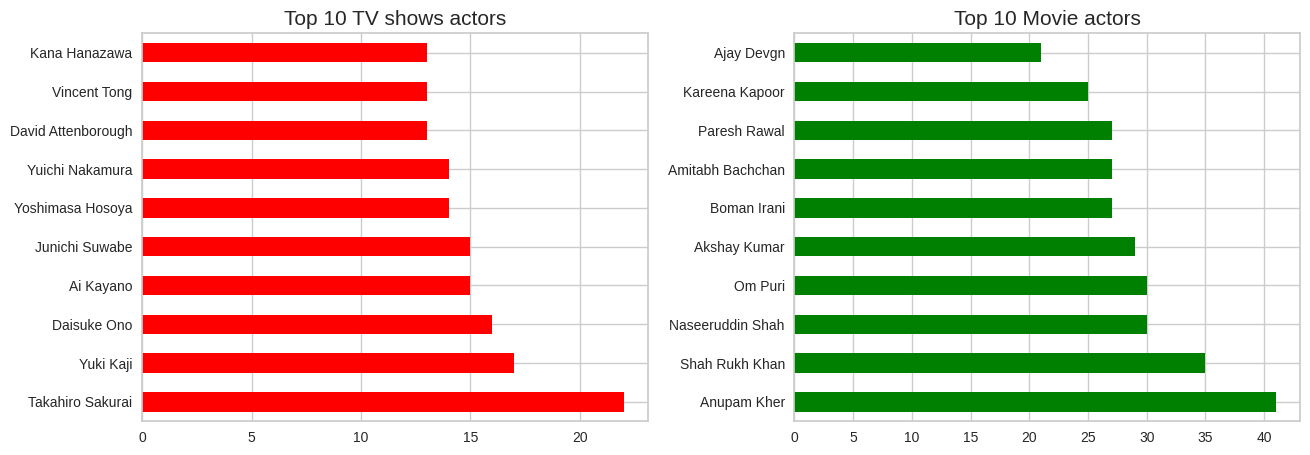

In [ ]:
# Chart - 7 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'Unknown']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'Unknown']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='green')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an actor has appeared in. The chart also includes titles and is divided into two subplots, making it clear that one subplot represents TV shows and the other represents movies.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher.

#### Chart - 7 (Top Genres)

In [ ]:
import plotly.express as px
import pandas as pd

counts = df['listed_in'].value_counts().head(10)
average = counts.mean()

df_genre = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]
fig = px.bar(df_genre, x='Category', y='Count', color='Category', color_discrete_sequence=colors)
fig.add_hline(y=average, line_color='red')
fig.update_layout(title='Top 10 Average Genere with Count',title_x=0.3)

fig.show()

##### 1. **Why did you pick the specific chart?**

**Answer Here.**

The chosen chart effectively presents the data, allowing viewers to easily compare the Average counts of different genres.

##### 2. **What is/are the insight(s) found from the chart?**

**Answer Here**

The average count of genres in the top 10 categories lies between 200-250. The genre with the highest count among all the genres is Documentaries, with a count of 334.

##### 3. **Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, the gained insights can help create a positive business impact for a streaming platform like Netflix or any other company in the entertainment industry.These insights, companies can refine their content strategies, enhance viewer satisfaction, attract a larger audience, and ultimately drive positive business impact in terms of increased viewership, customer retention, and revenue growth


#### Chart - 8 (Top Countries and their contents)

In [ ]:
# Chart - 9 visualization code
# Create subset of dataset with required data.
conuntryVSgenre = df[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  #Next, the function joins all the genre strings together into a single long string using the ", ".join()
  # method and then splits the long string into a list of individual genre strings using the split() method with ", " as the separator.
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

In [ ]:
conuntryVSgenre

country  \
0                                                Brazil   
1                                                Mexico   
2                                             Singapore   
3                                         United States   
4                                         United States   
...                                                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...   
7783                                              India   
7784                                      United States   
7785                                          Australia   
7786              United Kingdom, Canada, United States   

                                              listed_in  
0     International TV Shows, TV Dramas, TV Sci-Fi &...  
1                          Dramas, International Movies  
2                   Horror Movies, International Movies  
3     Action & Adventure, Independent Movies, Sci-Fi...  
4                                                Dramas  
...                                                 ...  
7782                       Dramas, International Movies  
7783     Dramas, International Movies, Music & Musicals  
7784  Documentaries, International Movies, Music & M...  
7785                 International TV Shows, Reality TV  
7786                    Documentaries, Music & Musicals  

[7770 rows x 2 columns]

In [ ]:
# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
country_genre_count_df

Genre  United States  India  United Kingdom  \
0             Action & Adventure            211  124.0            19.0   
1             Independent Movies            287  129.0            24.0   
2               Sci-Fi & Fantasy            102   10.0             6.0   
3                         Dramas            561  589.0            37.0   
4                      Thrillers            179   85.0            15.0   
5         International TV Shows            181   59.0           102.0   
6                      TV Dramas            262   24.0            20.0   
7                  Documentaries            425   18.0            79.0   
8                     Reality TV            136    3.0            32.0   
9                    TV Comedies            269   25.0            36.0   
10                      Comedies            500  293.0            31.0   
11                 Sports Movies             91   15.0            13.0   
12             Romantic TV Shows             85    9.0             9.0   
13               Romantic Movies            157  111.0             3.0   
14                    Docuseries            201    7.0            79.0   
15           Science & Nature TV             44    NaN            21.0   
16                        Movies             37    NaN             2.0   
17                 Horror Movies            132   31.0             9.0   
18                Crime TV Shows            136    8.0            36.0   
19                  TV Mysteries             38    3.0             1.0   
20              Music & Musicals            123   90.0            13.0   
21          International Movies            112  785.0            61.0   
22                  LGBTQ Movies             53    2.0             3.0   
23                      Kids' TV            201   10.0            18.0   
24         TV Action & Adventure             75    5.0             3.0   
25           TV Sci-Fi & Fantasy             44    3.0             1.0   
26                  Anime Series             15    NaN             NaN   
27              British TV Shows             16    1.0           186.0   
28      Children & Family Movies            305   16.0             7.0   
29                      TV Shows              8    2.0             NaN   
30  Stand-Up Comedy & Talk Shows             40    3.0             1.0   
31                   Cult Movies             32    5.0             3.0   
32               Stand-Up Comedy            240    6.0            20.0   
33                Classic Movies             53   11.0             3.0   
34                 Teen TV Shows             30    1.0             NaN   
35                     TV Horror             28    7.0             1.0   
36                  TV Thrillers             22    3.0             1.0   
37          Faith & Spirituality             30    3.0             NaN   
38             Classic & Cult TV             12    NaN             6.0   
39     Spanish-Language TV Shows             26    NaN             NaN   
40               Korean TV Shows             16    NaN             NaN   
41                Anime Features              1    NaN             NaN   

    Canada  Japan  France  South Korea  Spain  Mexico  Australia  
0     12.0   42.0    12.0         13.0    3.0     2.0        3.0  
1     15.0    NaN     8.0          NaN   11.0    12.0        4.0  
2      5.0    7.0     1.0          3.0    2.0     2.0        2.0  
3     21.0    9.0    29.0         18.0   35.0    22.0       16.0  
4     11.0    1.0     3.0         12.0   18.0     1.0        4.0  
5     18.0  128.0    30.0        138.0   43.0    32.0       26.0  
6     18.0   20.0    19.0         28.0    9.0     5.0       15.0  
7     20.0    NaN    22.0          1.0   16.0    10.0        5.0  
8      9.0    6.0     2.0          3.0    2.0     NaN       11.0  
9     14.0    6.0    14.0         13.0    5.0     3.0       11.0  
10    38.0    NaN    17.0          5.0   31.0    16.0        5.0  
11     6.0    NaN     7.0          NaN  

In [ ]:
# Plot the above data.
df_new= country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df_new['Genre'], values=df_new['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

 It is suitable for showing the distribution of different genres across multiple countries. Each pie chart represents a country, and the slices of the pie represent different genres. The size of each slice indicates the proportion of content in that genre for a particular country. This allows for easy comparison of genre distribution across countries in a visually appealing manner.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Action & Adventure and Dramas are the most prevalent genres across all countries. They have the highest values in most countries, indicating their popularity.The United States has a diverse content offering across multiple genres, with a strong presence in Action & Adventure, Dramas, Comedies, and Documentaries.


India has a significant focus on Independent Movies and Dramas, with relatively fewer offerings in other genres.

The United Kingdom has a good balance between Drama, International TV Shows, and Documentaries.

Australia's content offering is diverse, with a relatively balanced distribution across various genres such as Dramas, Comedies, International TV Shows, and Documentaries.

##### **3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights can potentially help create a positive business impact in the following ways:

1-**Targeted Content Strategy:** By understanding the genre preferences in different countries, businesses can develop a targeted content strategy that aligns with the interests of their target audience.

2-**Market Expansion:**The insights can help businesses identify countries where their content genres are highly popular. This knowledge can guide expansion plans and investment in those markets, increasing the chances of success and profitability.

3-**Content Localization:** Understanding the genre preferences in different countries can aid in content localization efforts. Adapting content to suit the local preferences can increase its appeal and viewership, potentially leading to business growth.

#### Chart - 9 (Top Ratings)

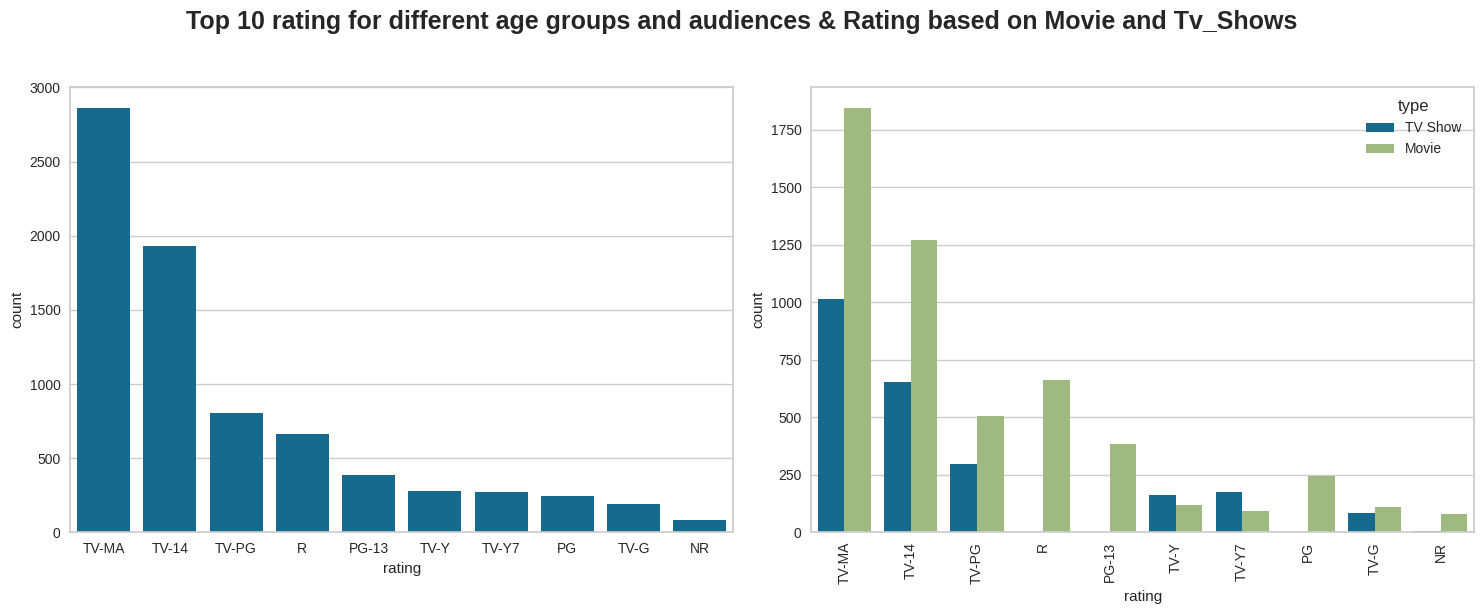

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#####**1. Why did you pick the specific chart?**

**Answer Here.**

 The chosen chart combination of two count plots allows for both univariate and bivariate analysis. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is **TV-MA**, which applies to both movies and TV shows.

#####**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The insight that **TV-MA** is the most common rating for both movies and TV shows can inform content strategies, audience targeting, programming decisions, and content diversity to drive positive business impact in terms of increased viewership and customer satisfaction

#### Chart - 10 (Top Directors)

In [ ]:
# Create a DataFrame with director counts
directors_list = df.director.value_counts().reset_index().head(11)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Create a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generate a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 10 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()


#### Chart - 11 (Correlation Heatmap between Target Audience and Contents by Country)

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [ ]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.512626       0.471976  
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199

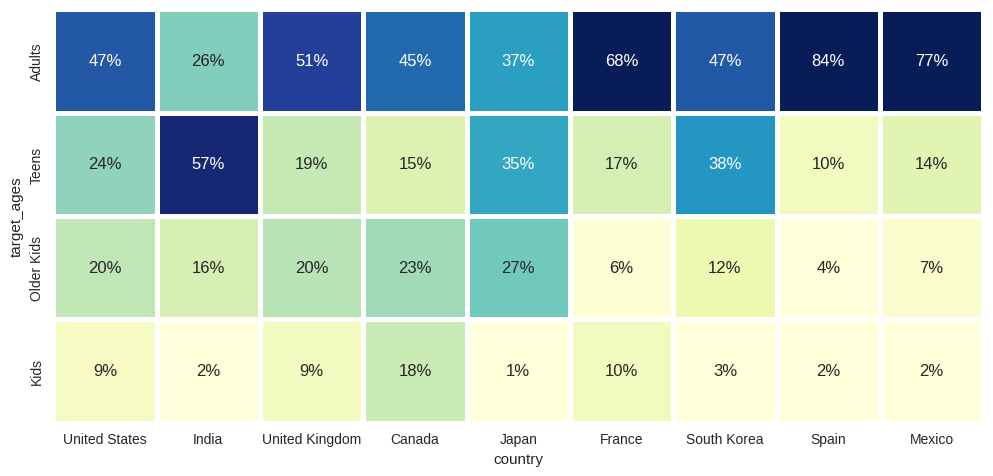

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here**

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.**India**- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.**United Kingdom** -It has a relatively high level of interest among adults, with 51% expressing interest.

4.**Mexico**-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.

5.**South Korea** , **United States**- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

6.**Japan**- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

7.**Canada**- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries**.

##### **3. Will the gained insights help creating a positive business impact?**

**Answer Here**

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

#### Chart - 12 (Correlation Heatmap between Target Audience and Content's Genre)

In [ ]:
df['count'] = 1
data1 = df.groupby('listed_in')[['listed_in', 'count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]
data1 = data1['listed_in']

In [ ]:
data1

0                                       Documentaries
1                                     Stand-Up Comedy
2                        Dramas, International Movies
3              Comedies, Dramas, International Movies
4    Dramas, Independent Movies, International Movies
5                                            Kids' TV
6                            Children & Family Movies
7                 Documentaries, International Movies
8                  Children & Family Movies, Comedies
9                      Comedies, International Movies
Name: listed_in, dtype: object

In [ ]:
df_heatmap1 = df.loc[df['listed_in'].isin(data1)]
df_heatmap1 = pd.crosstab(df_heatmap1['listed_in'],df_heatmap1['target_ages'],normalize = "index").T
df_heatmap1

listed_in    Children & Family Movies  Children & Family Movies, Comedies  \
target_ages                                                                 
Adults                       0.000000                            0.000000   
Kids                         0.564972                            0.177515   
Older Kids                   0.435028                            0.816568   
Teens                        0.000000                            0.005917   

listed_in    Comedies, Dramas, International Movies  \
target_ages                                           
Adults                                     0.345679   
Kids                                       0.004115   
Older Kids                                 0.123457   
Teens                                      0.526749   

listed_in    Comedies, International Movies  Documentaries  \
target_ages                                                  
Adults                             0.484472       0.386228   
Kids                               0.012422       0.059880   
Older Kids                         0.099379       0.254491   
Teens                              0.403727       0.299401   

listed_in    Documentaries, International Movies  \
target_ages                                        
Adults                                  0.377907   
Kids                                    0.063953   
Older Kids                              0.238372   
Teens                                   0.319767   

listed_in    Dramas, Independent Movies, International Movies  \
target_ages                                                     
Adults                                               0.660465   
Kids                                                 0.004651   
Older Kids                                           0.083721   
Teens                                                0.251163   

listed_in    Dramas, International Movies  Kids' TV  Stand-Up Comedy  
target_ages                                                           
Adults                           0.468750  0.000000         0.894081  
Kids                             0.006250  0.563725         0.000000  
Older Kids                       0.109375  0.436275         0.018692  
Teens                            0.415625  0.000000         0.087227

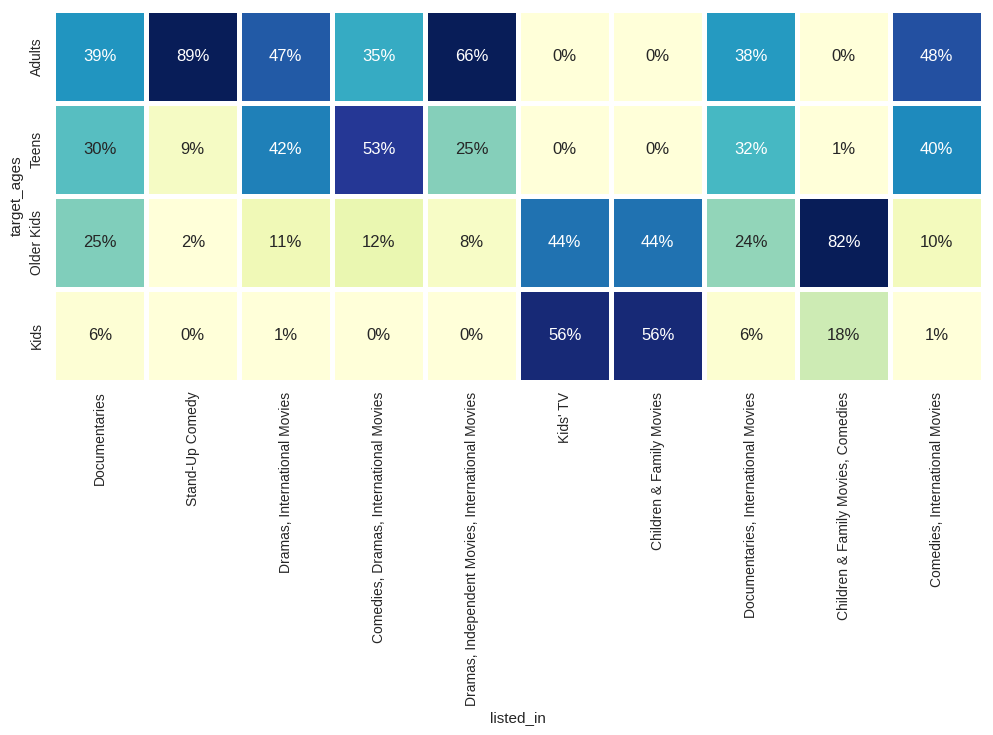

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

top=['Documentaries', 'Stand-Up Comedy', 'Dramas, International Movies',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies', "Kids' TV",
       'Children & Family Movies', 'Documentaries, International Movies',
       'Children & Family Movies, Comedies',
       'Comedies, International Movies']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap1.loc[age_order, top],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The heatmap is a suitable choice for this scenario because it allows me to represent the data using color encoding. The color intensity represents the frequency or proportion of movie genres within each age group.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The genre with the highest target audience of 89% adults is stand-up comedy.Children & Family Movies,Comedies also have a significant target audience with 82%. Primarily catering to older kids ,adults, Kids & TV shows have a target audience of around 66% to 53%.

#### Chart - 13 (Top Countries)

In [ ]:
country_count=df['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

country
United States      3051
India               923
United Kingdom      396
Japan               224
South Korea         183
Canada              177
Spain               134
France              115
Egypt               101
Turkey              100
Mexico              100

In [ ]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

 Funnel charts are often used to represent a gradual reduction in data as it moves through different stages or categories. In this case, the chart visualizes the number of movies in the top 10 countries, showcasing the decreasing count from the top to the bottom.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here.**

The United States has the highest number of movies, with 3062 films/tv shows, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies and tv shows, demonstrating a significant presence in the global Movies/TV shows market.

##### **3. Will the gained insights help creating a positive business impact?**

**Answer Here.**

Yes, the gained insights can help create a positive business impact in several ways:

1-**Talent Acquisition :** This insight can be valuable for businesses looking to recruit skilled individuals in areas such as filmmaking, writing, acting, or technical roles.

2**-Market Expansion:**The insights reveal countries with a significant number of movies, such as the United States and India. This information can guide businesses in expanding their operations and targeting these markets for distribution, marketing, and partnerships.

## 3. Hypothesis Testing

### Making Dataset Ready for Hypothesis Testing

In [ ]:
df_hypothesis = df.copy()

In [ ]:
df_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added target_ages  count  
0            8      Adults      1  
1           12      Adults      1  
2           12      Adults      1  
3           11       Teens      1  
4            1       Teens      1

In [ ]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

title            Directors
7209  The Magic School Bus Rides Again The Frizz Con...       Richard Weston
5061                                          Our House  Anthony Scott Burns
971                                       Big Stone Gap     Adriana Trigiani
7343                                     The Pharmacist         Jenner Furst
6019                                            Shooter              Unknown
6444                                     Sweet Virginia        Jamie M. Dagg
2482                                       Frozen River        Courtney Hunt
2883                                 He Named Me Malala     Davis Guggenheim
3077                                        How It Ends   David M. Rosenthal
7746                                              Tobot              Unknown

In [ ]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

title                        Actors
2769             Alakada Reloaded               Kehinde Bankole
11837                 Dark Desire                  Fabián Merlo
2762      Ala Vaikunthapurramuloo                    Allu Arjun
47948                 The Mansion               Marc Jarousseau
6642             Bhaji In Problem                Gurpreet Guggi
35834        Puppy Star Christmas                 Mackenzie Sol
43139  Tee Shot: Ariya Jutanugarn  Atchareeya Potipipittanakorn
36209      Rachel Getting Married                    Bill Irwin
44027                 The Bleeder                Morgan Spector
11257              Criminal Minds                 Thomas Gibson

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

title                   Genre
2773                     Chal Dhar Pakad                  Dramas
11136               Ram Teri Ganga Maili          Classic Movies
8011                Live Up To Your Name  International TV Shows
4749               Finally Found Someone         Romantic Movies
10801    Power Rangers Dino Super Charge                Kids' TV
13945               The Furchester Hotel        British TV Shows
16133                      V.R. Troopers                Kids' TV
11164                           Rangreza    International Movies
1294                               Asees                  Dramas
13358  The Battered Bastards of Baseball           Sports Movies

In [ ]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

title         Country
3424                     Hot Bot   United States
4875                     Messiah   United States
3023      Good Morning, Verônica          Brazil
6194                   Red Trees  United Kingdom
1384              Bullitt County   United States
3542         I Called Him Morgan          Sweden
1427                        Cake        Pakistan
2606            Feo pero sabroso        Colombia
1223      BNK48: Girls Don't Cry        Thailand
2112  Di Renjie zhi Sidatianwang           China

In [ ]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

title            Actors Directors                   Genre Country
0    3%       João Miguel   Unknown  International TV Shows  Brazil
1    3%       João Miguel   Unknown               TV Dramas  Brazil
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df_hypothesis = df7.merge(df_hypothesis[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df_hypothesis.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2020-08-14          2020  TV-MA  4 Seasons   
2 2020-08-14          2020  TV-MA  4 Seasons   
3 2020-08-14          2020  TV-MA  4 Seasons   
4 2020-08-14          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
df_hypothesis['duration']= df_hypothesis['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
df_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   title         175807 non-null  object        
 1   Actors        175807 non-null  object        
 2   Directors     175807 non-null  object        
 3   Genre         175807 non-null  object        
 4   Country       175807 non-null  object        
 5   type          175807 non-null  object        
 6   date_added    175807 non-null  datetime64[ns]
 7   release_year  175807 non-null  int64         
 8   rating        175807 non-null  object        
 9   duration      175807 non-null  int64         
 10  description   175807 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 16.1+ MB


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
* **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

* **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

*Hypothetical Statement 2:*
* **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

* **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 3:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

#### Hypothetical Statement 1

##### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

##### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df_hypothesis[df_hypothesis['Genre'].str.contains('Dramas') | df_hypothesis['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

#### Hypothetical Statement - 2

##### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

##### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df_hypothesis[(df_hypothesis['type'] == 'TV Show') & (df_hypothesis['release_year'] == 2020)]
tv_2021 = df_hypothesis[(df_hypothesis['type'] == 'TV Show') & (df_hypothesis['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')

t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

#### Hypothetical Statement 3

##### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

##### 2. Perform an appropriate statistical test.

In [ ]:
# Spearating the dataframes for further analysis
df_movies= df_hypothesis[df_hypothesis['type']== 'Movie']
df_tvshows= df_hypothesis[df_hypothesis['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 11) (49728, 11)


In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  -4.838078469799881
p-value:  1.3110038583414833e-06
Reject the null hypothesis.


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.

## 4. Feature Engineering & Data Pre-processing

In [ ]:
df_new = df.copy()

In [ ]:
df_new = df_new.drop(columns=['day_added','year_added','month_added','target_ages','count'])

#### Create new features to store date, day, month and year seperately

In [ ]:
# Write your code to make your dataset analysis ready.

df_hypothesis["date_added"] = pd.to_datetime(df_hypothesis['date_added'])  # First convert date_added to date time format.
df_hypothesis['day_added'] = df_hypothesis['date_added'].dt.day            # Compute day.
df_hypothesis['year_added'] = df_hypothesis['date_added'].dt.year          # Compute year.
df_hypothesis['month_added'] = df_hypothesis['date_added'].dt.month        # Compute month.

#### Binning of Rating Attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**Let's not complicate it and create bins as following:**
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df_hypothesis['rating'].replace(rating_map, inplace = True)
df_new['rating'].replace(rating_map, inplace = True)
df_hypothesis['rating'].unique()
df_new['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df_hypothesis.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
day_added       0
year_added      0
month_added     0
dtype: int64

Let's move ahead, as we have already dealt with the null/missing values from our dataset.

### 2. Handling Outliers

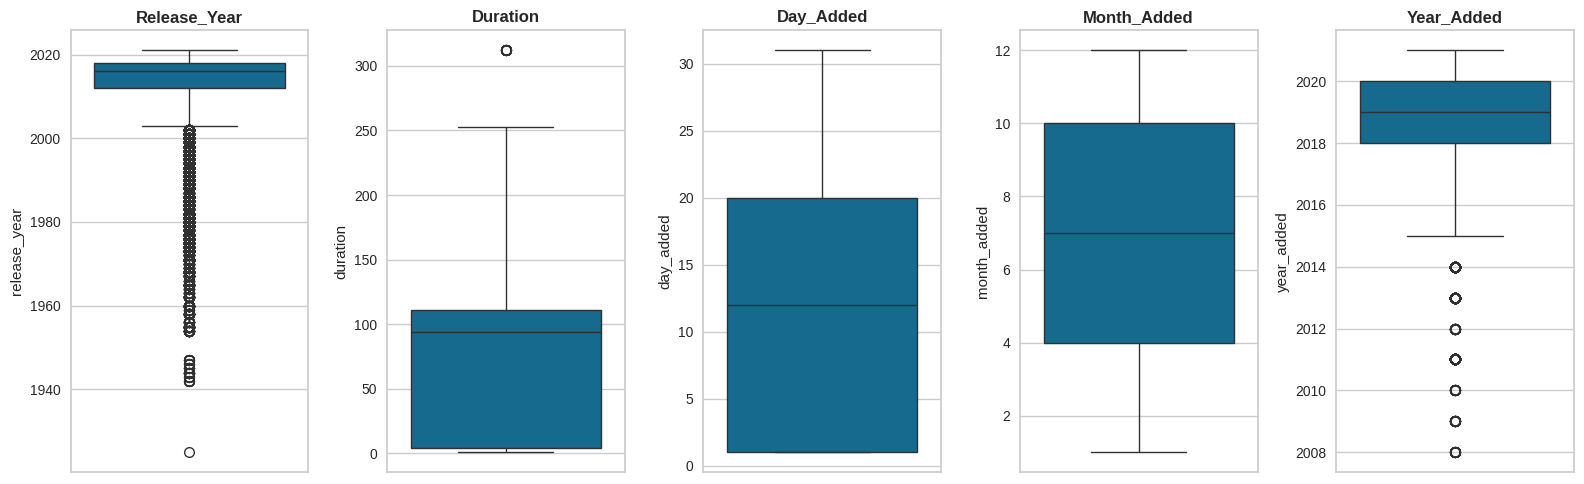

In [ ]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df_hypothesis[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

### 3. Textual Data Preprocessing

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df_hypothesis.shape, df_new.shape

((175807, 14), (7770, 12))

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

show_id   type                                  title          director  \
1142   s1143  Movie  Burlesque: Heart of the Glitter Tribe       Jon Manning   
5416   s5417  Movie                       Saving Mr. Banks  John Lee Hancock   

                                                   cast  \
1142                                            Unknown   
5416  Emma Thompson, Tom Hanks, Paul Giamatti, Jason...   

                                       country date_added  release_year  \
1142                             United States 2017-06-01          2017   
5416  United States, United Kingdom, Australia 2019-03-02          2013   

             rating duration         listed_in  \
1142  Adult Content   76 min     Documentaries   
5416   Teen Content  126 min  Comedies, Dramas   

                                            description  
1142  This revealing documentary probes the onstage ...  
5416  When Walt Disney sets his sights on obtaining ...

#### 1. Textual Columns

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year         rating   duration  \
0 2020-08-14          2020  Adult Content  4 Seasons   
1 2016-12-23          2016  Adult Content     93 min   
2 2018-12-20          2011  Adult Content     78 min   
3 2017-11-16          2009   Teen Content     80 min   
4 2020-01-01          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [ ]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teen content india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [ ]:
df_new['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adult content brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### 6. Tokenization

In [ ]:
# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'content',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 7. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

* **Lemmatization produces a more accurate base word**: Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

* **Lemmatization can handle different inflections**: Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

* **Lemmatization produces real words**: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

* **Lemmatization improves text understanding**: By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

* **Lemmatization supports multiple languages**: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 8. Part of speech tagging

In [ ]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year         rating   duration  \
0 2020-08-14          2020  Adult Content  4 Seasons   
1 2016-12-23          2016  Adult Content     93 min   
2 2018-12-20          2011  Adult Content     78 min   
3 2017-11-16          2009   Teen Content     80 min   
4 2020-01-01          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### 9. Text Vectorization

In [ ]:
# Vectorizing Text
# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [ ]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 4. Dimesionality Reduction

##### Why does dimensionality reduction is needed? Explain.

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
# Dimensionality Reduction

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44285929e-02 4.03650307e-03 3.30085224e-03 ... 1.19007193e-35
 5.87480154e-36 6.87367427e-37]


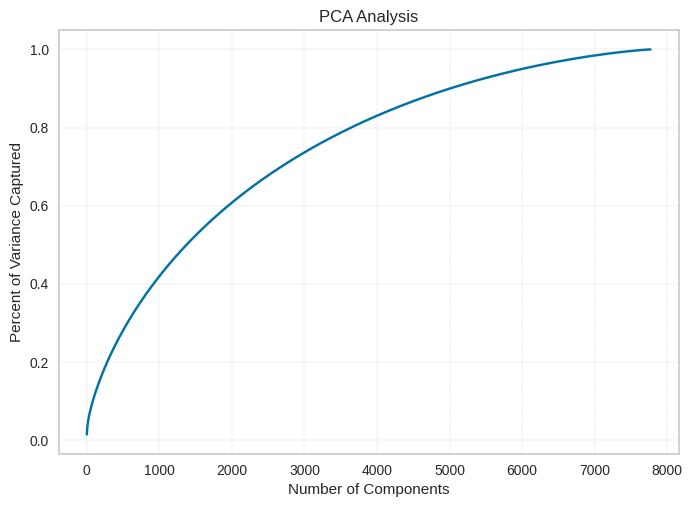

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 5997)

##### Which dimensionality reduction technique have you used and why?

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## **7. ML Model Implementation**

### ML Model - 1 (K-Means Clustering)

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid. It works iteratively by assigning each data point to its nearest centroid and then re-computing the centroid of each cluster based on the new assignments. The algorithm terminates when the cluster assignments no longer change or when a maximum number of iterations is reached.

Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

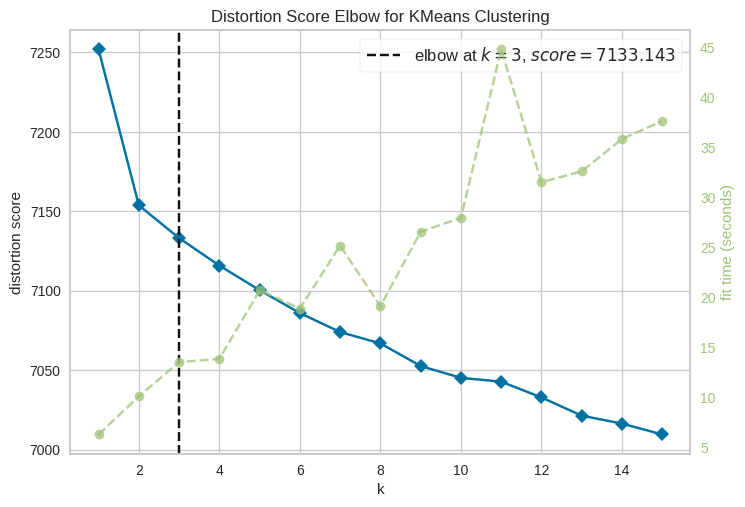

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

Okay, but what is **Silhouette Score**?

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

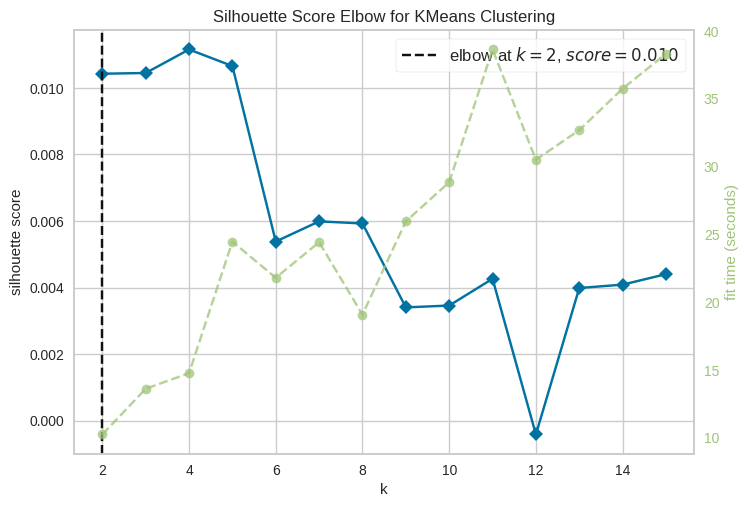

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [ ]:
## Computing Silhouette score for each k

# Defining Range
k_range = range(2, 25)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010361
k=3, Silhouette score=0.009940
k=4, Silhouette score=0.010567
k=5, Silhouette score=0.010921
k=6, Silhouette score=0.005443
k=7, Silhouette score=0.006198
k=8, Silhouette score=0.004239
k=9, Silhouette score=0.004307
k=10, Silhouette score=0.005558
k=11, Silhouette score=0.003944
k=12, Silhouette score=0.004920
k=13, Silhouette score=0.005419
k=14, Silhouette score=0.006321
k=15, Silhouette score=0.005131
k=16, Silhouette score=0.004092
k=17, Silhouette score=0.004808
k=18, Silhouette score=0.005589
k=19, Silhouette score=0.005662
k=20, Silhouette score=0.005921
k=21, Silhouette score=0.004897
k=22, Silhouette score=0.006302
k=23, Silhouette score=0.004452
k=24, Silhouette score=0.005580


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 5 cluster in kmeans analysis.

Now let's plot and see how our data points look like after assigning to their respective clusters.

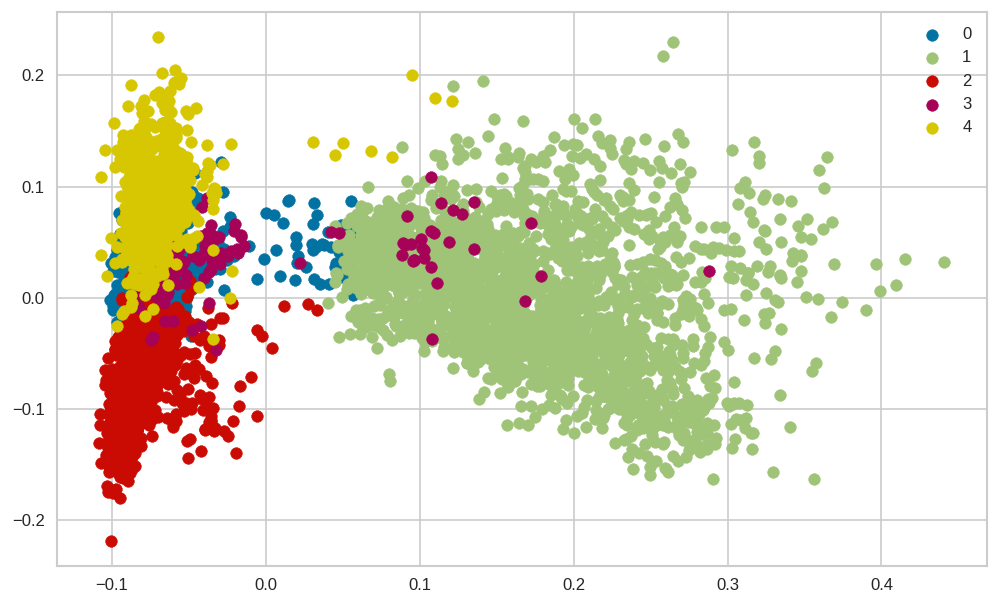

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

We have 5 different clusters but unfortunately the above plot is in TWO-DIMENSIONAL. Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

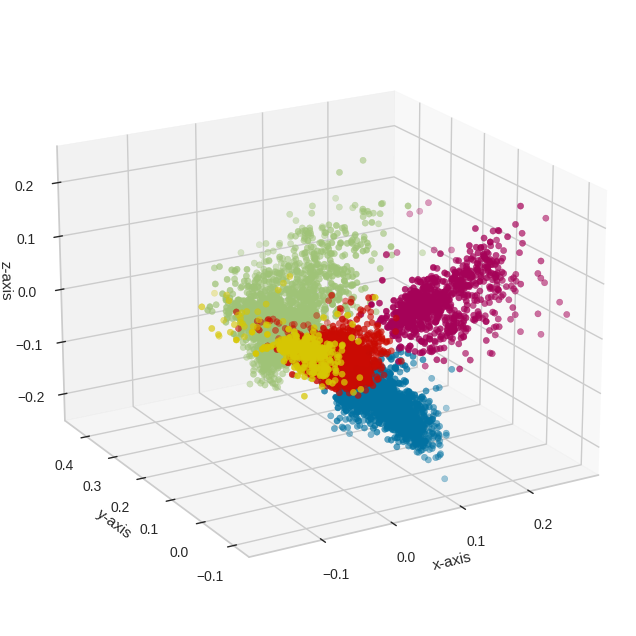

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y', 'm']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

Now, we can easily differentiate the all 4 clusters with naked eye. Now let's assign the 'Conent' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance ?

Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

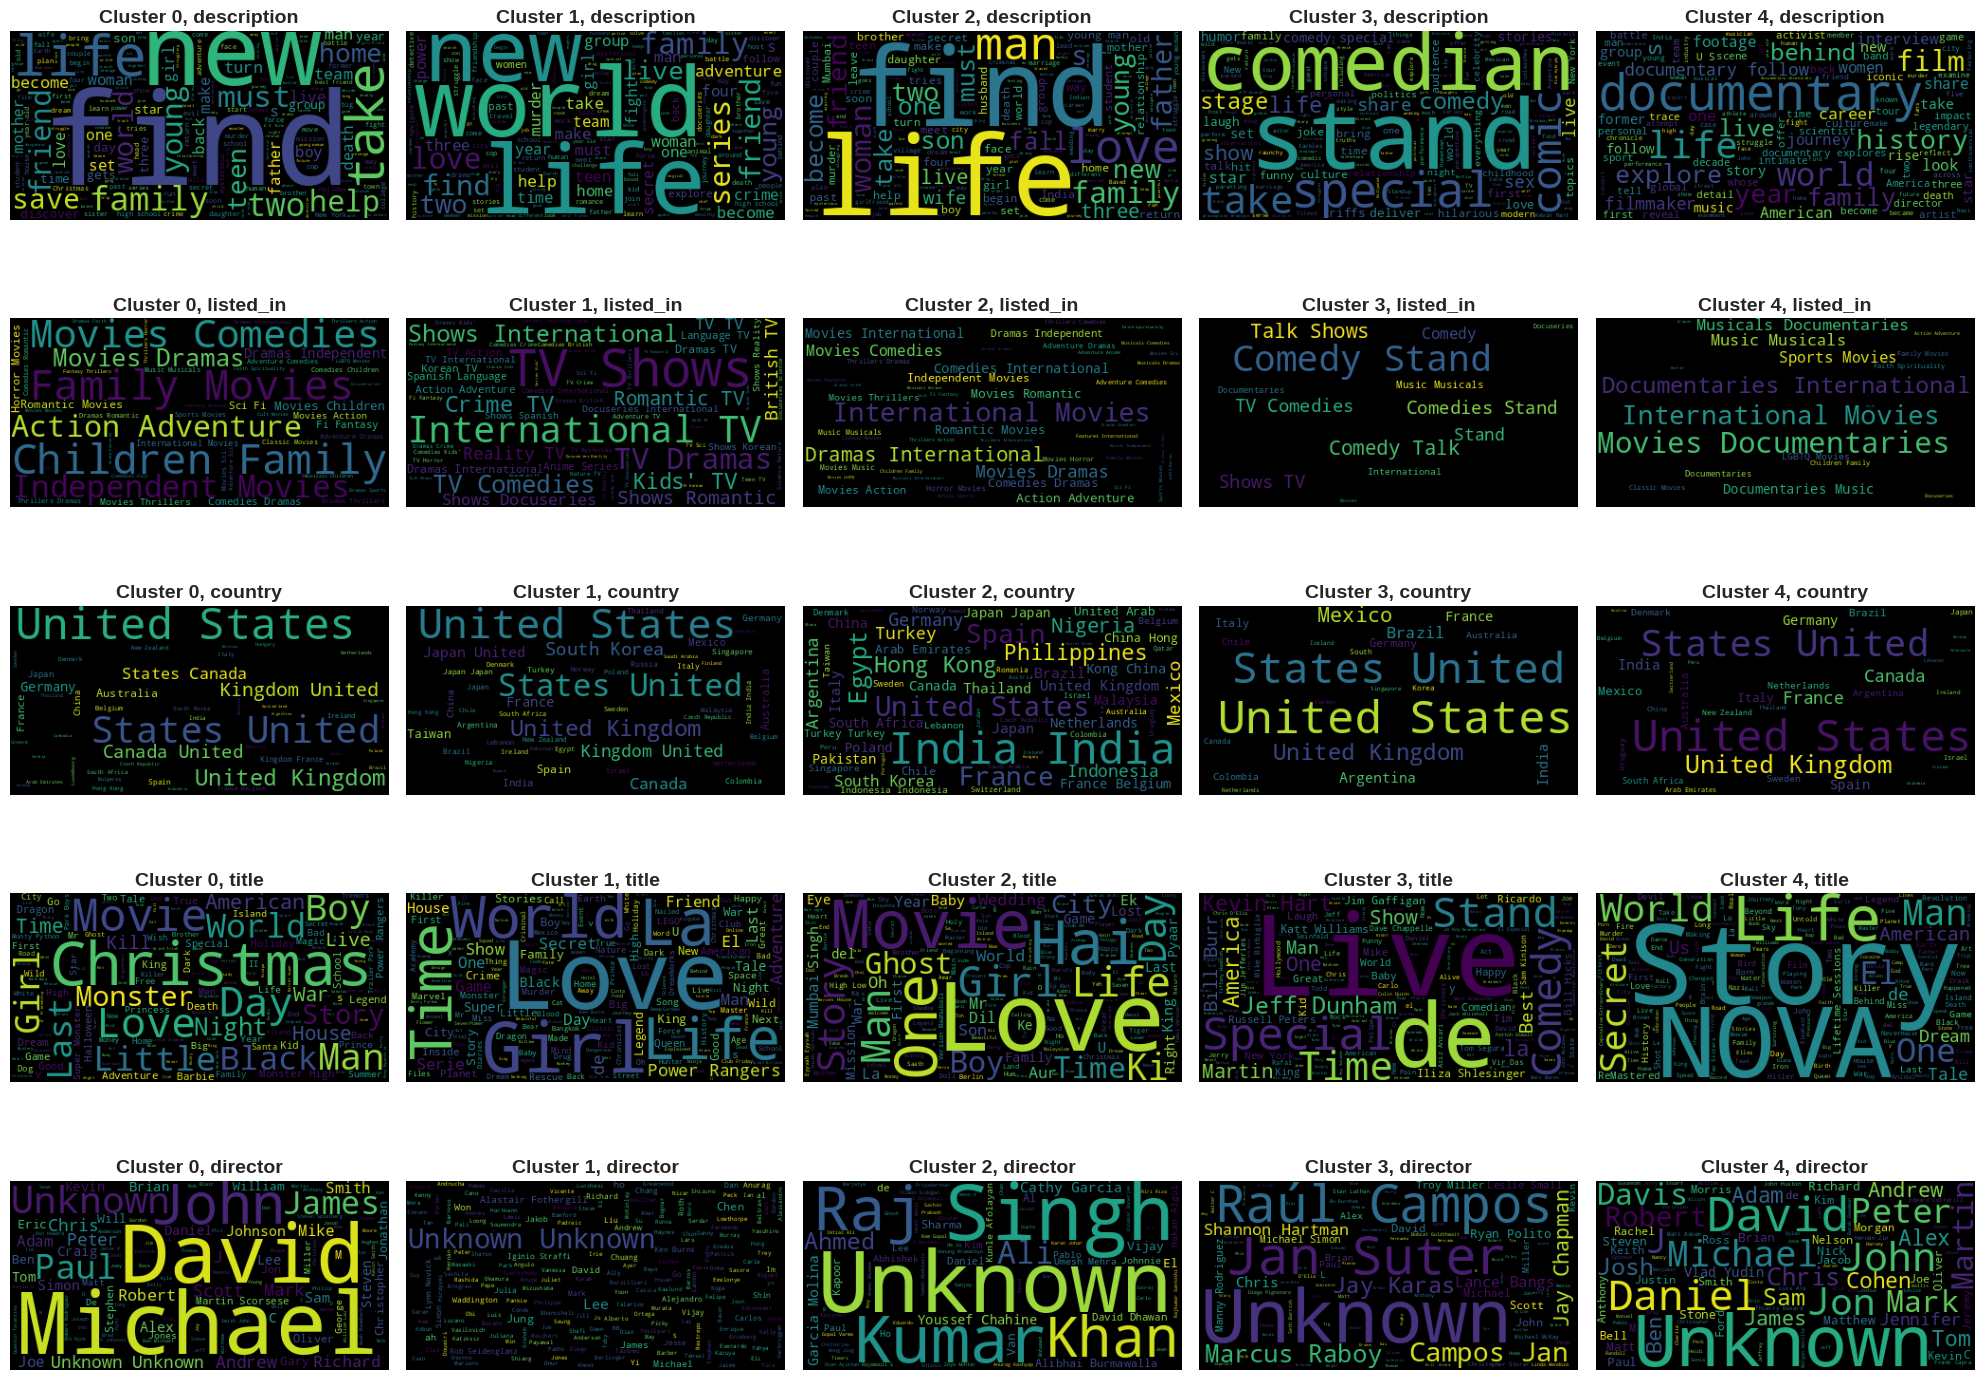

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
for i in range(5):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title', 'director', 'cast']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 (Hierarchial Clustering)

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

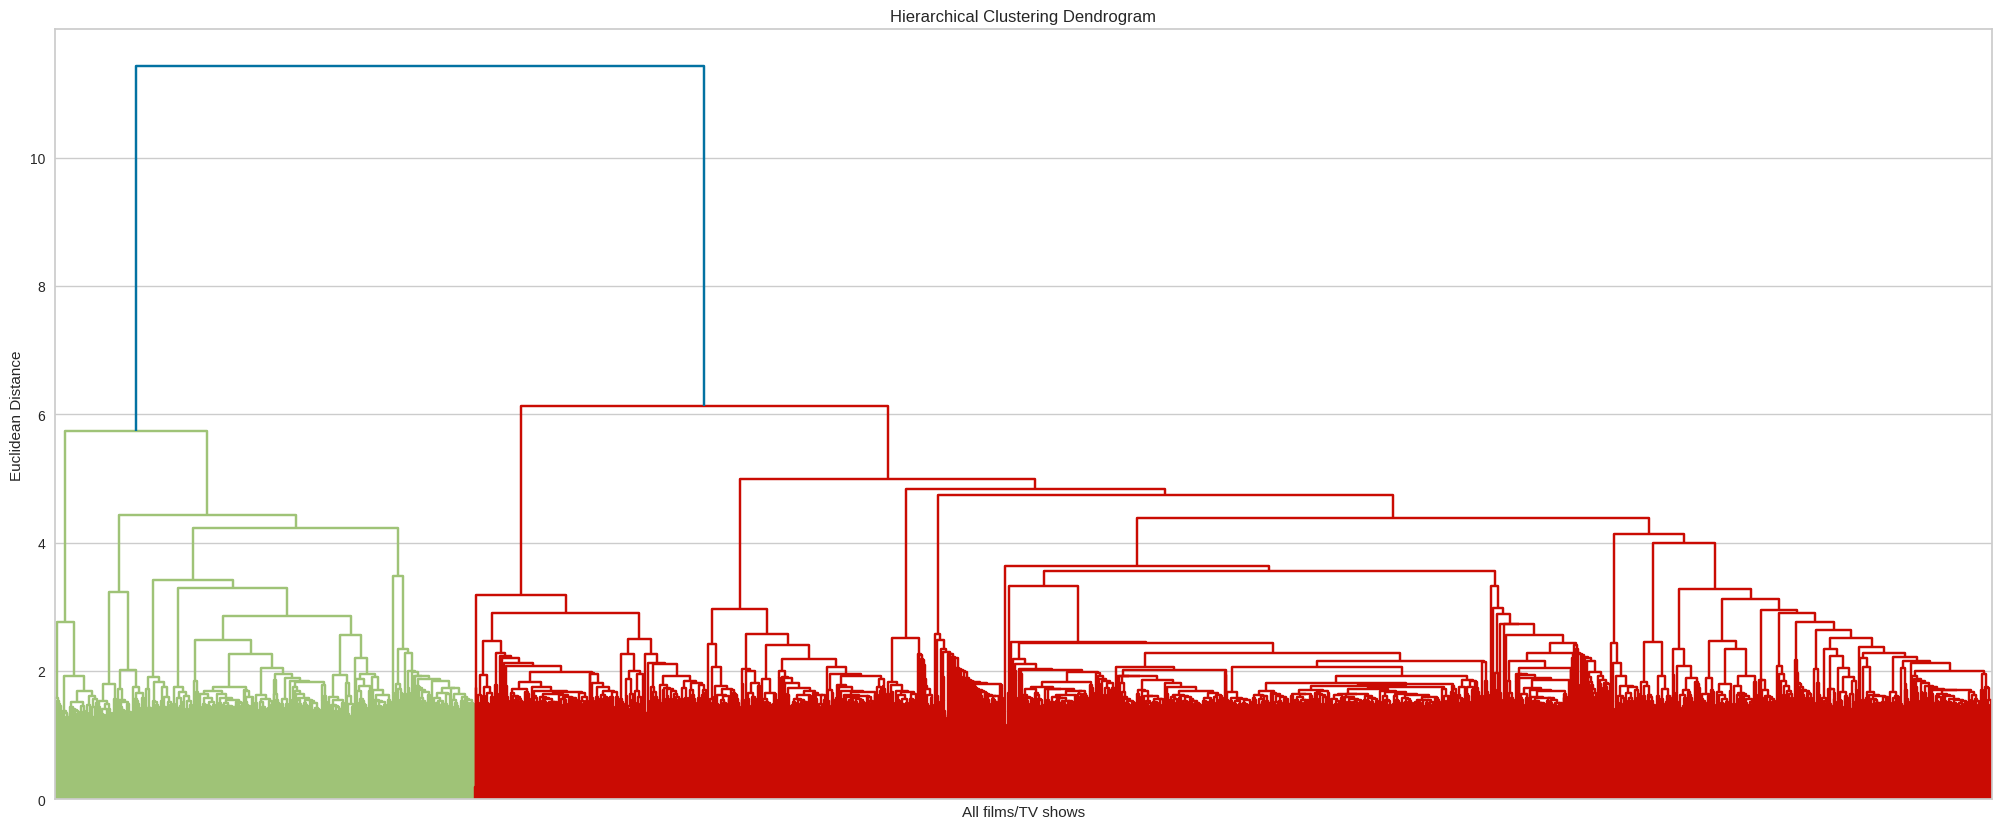

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

What is Dendogram and how to determine the **optimal value of clusters?**

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.005102
k=3, Silhouette score=0.004963
k=4, Silhouette score=0.000350
k=5, Silhouette score=0.000442
k=6, Silhouette score=0.001113
k=7, Silhouette score=0.001415
k=8, Silhouette score=0.000528
k=9, Silhouette score=0.000950


From the above silhouette scores it is clear that the 2  clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

Let's again plot the chart and observe the 2 different formed clusters.

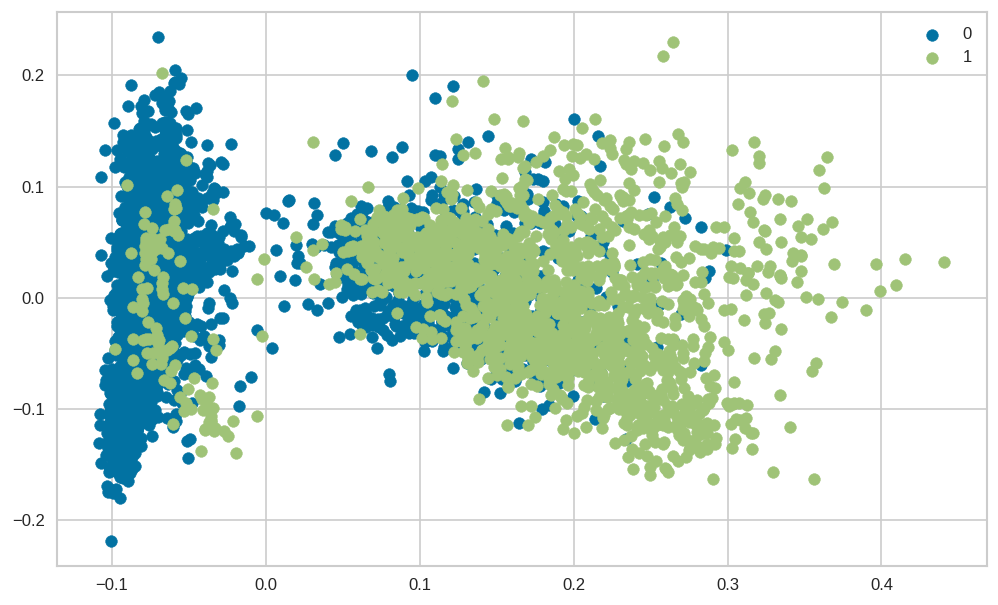

In [ ]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Again plotting the 3 Dimensional plot to see the clusters clearly.

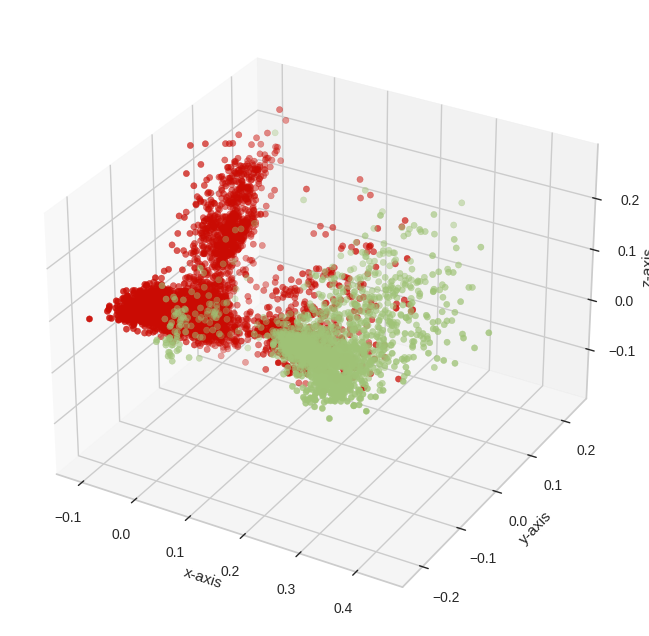

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

We can again easily differentiate the all 2 clusters with naked eye. Now let's assign the 'Content(Movies and TV Shows)' in their respective cluster by appending 1 more attribute in the final dataframe.

In [ ]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Let's just again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

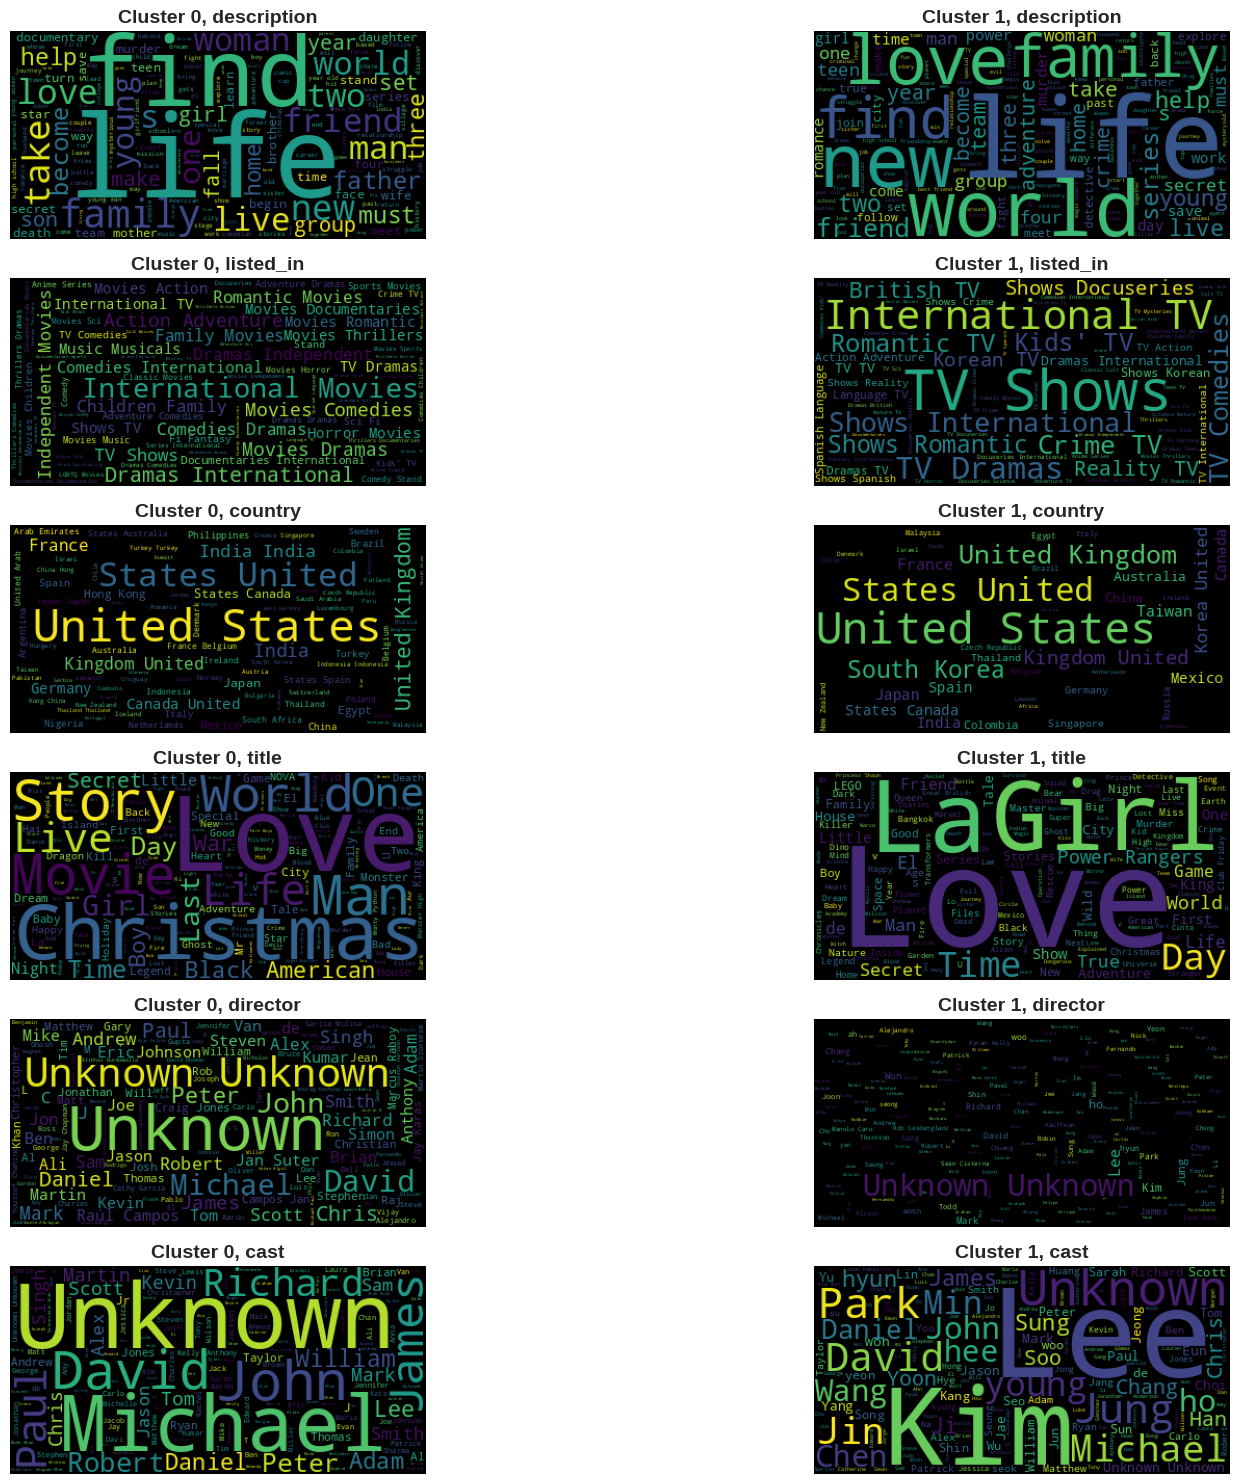

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title', 'director', 'cast']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 (Building a Recommendaton System using Cosine Similarity)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2567
1                                          Kya Kehna                 0.2300
2  My Next Guest with David Letterman and Shah Ru...                 0.2048
3                                 Kuch Kuch Hota Hai                 0.1842
4                              Together For Eternity                 0.1840
5                               Kabhi Haan Kabhi Naa                 0.1814
6                                    Chashme Baddoor                 0.1776
7                           Kabhi Khushi Kabhie Gham                 0.1725
8                             Kabhi Alvida Naa Kehna                 0.1713
9                                      Chalte Chalte                 0.1699

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0     30 Minutes or Less                 0.1600
1                Kingpin                 0.1121
2        No Reservations                 0.1113
3          THE RUM DIARY                 0.1020
4            Night Moves                 0.1013
5    The End of the Tour                 0.0925
6                   Hush                 0.0923
7  The Edge of Seventeen                 0.0877
8             Santa Girl                 0.0874
9        Kiss the Ground                 0.0874

In [ ]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

Recommendation  Similarity_score(0-1)
0     7 Din Mohabbat In                 0.1842
1              Humsafar                 0.1795
2         Chupan Chupai                 0.1630
3        Sadqay Tumhare                 0.1370
4                Khaani                 0.1306
5        Ho Mann Jahaan                 0.1269
6                 Virsa                 0.1184
7                  Cake                 0.1178
8  Rica, Famosa, Latina                 0.1163
9  My Husband Won't Fit                 0.1134

In [ ]:
# Testing non indian tv show
recommend_content('The Originals')

Recommendation  Similarity_score(0-1)
0            The Vampire Diaries                 0.1829
1            H2O: Just Add Water                 0.1762
2  Fear Files... Har Mod Pe Darr                 0.1754
3                         Bitten                 0.1494
4                  L.A.’s Finest                 0.1305
5                        Dracula                 0.1260
6        I AM A KILLER: RELEASED                 0.1257
7    Anjaan: Special Crimes Unit                 0.1248
8                       The 4400                 0.1236
9                  The Staircase                 0.1174

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

## 8. Conclusion

### **Conclusions drawn from EDA**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**

* Movies make up about **two-thirds **of Netflix content, with TV shows comprising the remaining **one-third**.

* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

* Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.

* **Jan Suter** is the most common movie director, and **Ken Burns** is the most common TV show director on Netflix.

* The **United States** is the largest producer of movies and TV shows on Netflix, followed by **India**. **Japan** and **South Korea** have more TV shows than movies, indicating growth potential in that area.

* **International movies, drama, and comedy** are the most popular genres on Netflix.

* TV show additions on Netflix have increased since **2018**, while movie additions have decreased. In **2020**, fewer movies were added compared to **2019**, but more TV shows were added.

* **October, November, and December** are popular months for adding TV shows, while **January, October, and November** are popular for adding movies. February sees the least additions.

* **Movies and TV shows** are typically added at the beginning or middle of the month and are popularly added on weekends.

* Most movies on Netflix have durations between **80 to 120 minutes**, while TV shows commonly have **one or two seasons**.

* Various countries contribute **adult and teen content**, with Spain producing the most **adult content** and Canada focusing on **children and family-friendly** categories.

### **Conclusions drawn from ML Model**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

##  **Future Work (Optional)**

- Integrating this dataset with external sources such as IMDB ratings,books clsutering ,Plant based Type clustering  can lead to numerous intriguing discoveries.

- By incorporating additional data, a more comprehensive recommender system could be developed, offering enhanced recommendations to users. This system could then be deployed on the web for widespread usage.